## K-Fold Cross-Validation for Random Forest

Send me your Jupyter Notebook to my email (jose.perez.castellanos@itam.mx) in the following format: hw2_name_surname.ipynb. Make sure to copy the whole 'assignment2' folder to your local repository or computer and use relative paths, as we have seen in class. I should be able to run all your codes without changing the paths and just saving your file in the same path structure.

e.g: '../data/input/file.xlsx'

Overall Instructions:

In Machine Learning, while evaluating metrics from a certain model we usually want to make sure that this metrics are not dependent of the randomness induced at separating the data set into training and test. We want to make sure that our results are not dependent of a particular choice of training and validation sets.

To do this we will use K-Fold Cross Validation, which consists of splitting our dataset 4 or 5 times into training and test, such that the test data is always different, and train and evaluate our model keeping constant our hyper-parameters. The final validation accuracy would be the mean of the 4 or 5 individual accuracies obtained.


## First lets explain what is K-Fold Cross Validation

### What is K-Fold Cross Validation?
K-fold cross-validation and bootstrapping (seen in class) are both resampling techniques used in model validation, but they have different mechanisms and objectives. K-fold, instead of relying on a single train-test split, the dataset is divided into `k` subsets (or folds), where each fold takes turns being the test set while the remaining `k-1` folds form the training set.

### Why Use K-Fold?
- Reduces bias by ensuring that every observation is used for both training and testing.
- Provides a more reliable estimate of model performance.
- Helps in selecting optimal hyperparameters by minimizing the impact of random data splits.

### How It Works:
1. **Shuffle** the dataset to ensure randomness.
2. **Split** the dataset into `k` equal folds.
3. **Train** the model on `k-1` folds and **test** it on the remaining fold.
4. **Repeat** the process `k` times, each time using a different fold as the test set.
5. **Compute the average accuracy** across all folds as the final evaluation metric.

#Code implementation (example):

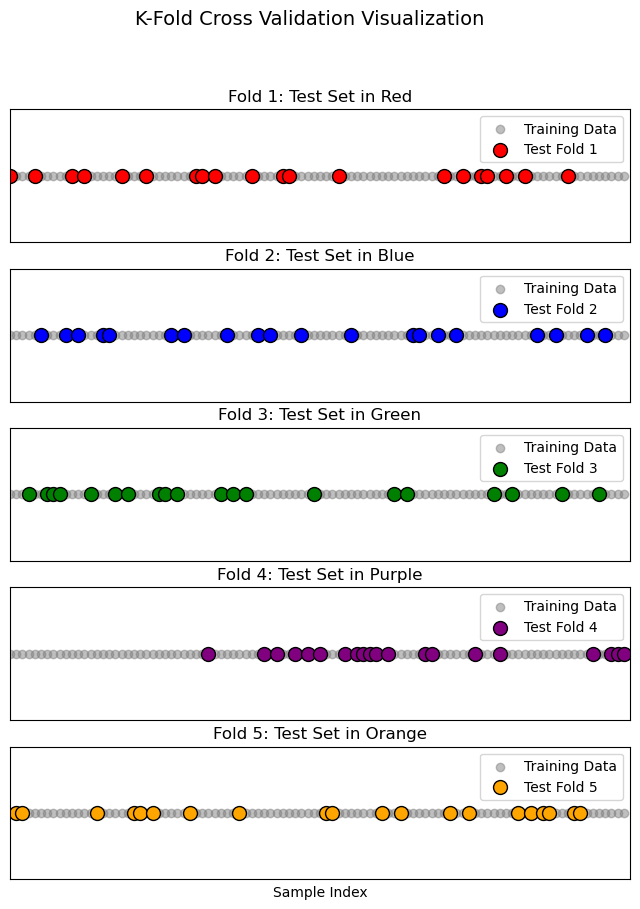

Final K-Fold Accuracy: 0.9900 ± 0.0200


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=5, random_state=42)

# Define K-Fold Cross Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []
fold_idx = 1

# Initialize plot
fig, axes = plt.subplots(k, 1, figsize=(8, 10), sharex=True)
colors = ['red', 'blue', 'green', 'purple', 'orange']
indices = np.arange(len(y))

for train_index, test_index in kf.split(X):
    # Train/Test Split
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    # Visualization
    ax = axes[fold_idx - 1]
    ax.scatter(train_index, np.ones_like(train_index), color='gray', label="Training Data", alpha=0.5)
    ax.scatter(test_index, np.ones_like(test_index), color=colors[fold_idx-1], label=f"Test Fold {fold_idx}", s=100, edgecolor='black')
    ax.set_title(f"Fold {fold_idx}: Test Set in {colors[fold_idx-1].capitalize()}")
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim([0, len(y)])
    ax.legend(loc='upper right')
    
    fold_idx += 1

plt.suptitle("K-Fold Cross Validation Visualization", fontsize=14)
plt.xlabel("Sample Index")
plt.show()

# Print the final accuracy
print(f"Final K-Fold Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")


#### 1) Import the necessary packages to run a Random Forest.

#### 1.1) import the Iris_reproducible data set and generate X and y:

#### 2) Run the following code, which is the one from the homework with the optimal hyper-parameters

In [ ]:
# Split into training and test using the same seed:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=41)

# Define and train the ensemble with the optimal hyper-parameters:
clf=RandomForestClassifier(n_estimators=10, max_depth = 5, 
                           min_samples_leaf = 1, min_samples_split = 3, 
                           random_state = 43)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Accuracy:
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

#### 3) Run the code for 6 different seeds (at the train_test_split() function). Store the 6 accuracies in a list and print it

(You can build a function, run a loop and store the accuracies or do it manually)

If you've done this correctly, you will notice that the accuracy depends on the random division of the training and the test set. This usually happens with small training data sets as Iris, but it is also good practice to do Cross Validation when we have a big data set, for robustness check.

To do it for the Random Forest, sklearn provides us with a function named cross_val_score.

#### 4) Import the function cross_val_score from sklearn

#### 4.1) Check the function documentation and calculate the cross-validation score (set cv = 5) for the clf model defined above. 

#### 4.2) Notice this will be a vector, obtain the final test accuracy by obtaining the mean of the 5 accuracies given by the function: